<a href="https://colab.research.google.com/github/aisinhub/python_code/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【標本から導出されたパラメータ】
平均ベクトル μ ≈ [0.15394513 0.12950859]
共分散行列 Σ ≈
 [[3.07322581 2.57092246]
 [2.57092246 3.06230562]]

ユークリッド距離: 7.616
マハラノビス距離: 5.005


/tmp/ipython-input-6-2534410671.py:71: UserWarning: Glyph 12518 (\N{KATAKANA LETTER YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2534410671.py:71: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2534410671.py:71: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2534410671.py:71: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2534410671.py:71: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2534410671.py:71: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2534410671.py:71: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from 

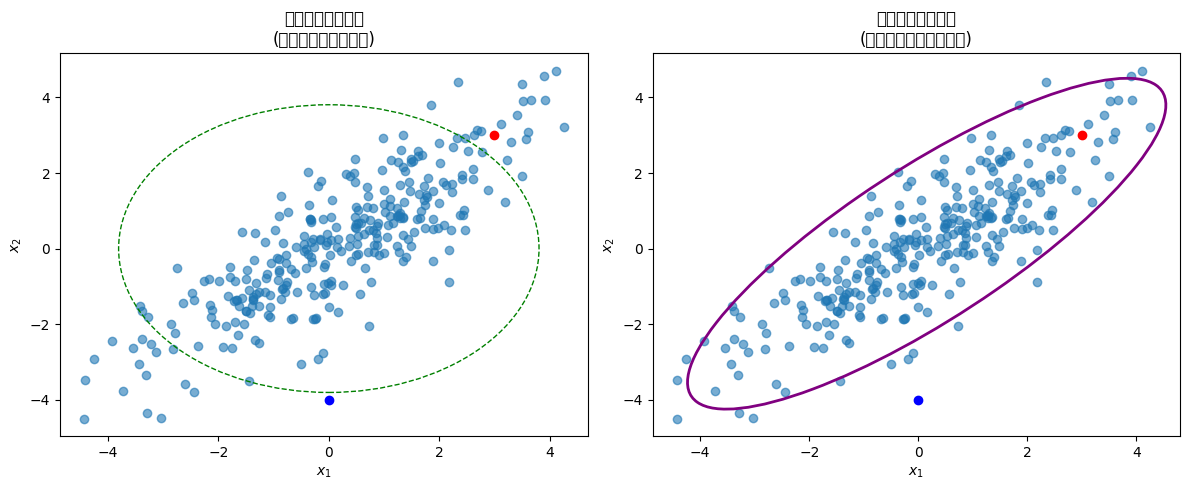

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from matplotlib.patches import Ellipse

# 母集団の平均と共分散行列
mu = np.array([0, 0])
sigma = np.array([[3, 2.5],
                  [2.5, 3]])

# 標本を生成
np.random.seed(0)
samples = np.random.multivariate_normal(mu, sigma, size=300)

# 標本から推定された平均と共分散
sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)

print("【標本から導出されたパラメータ】")
print(f"平均ベクトル μ ≈ {sample_mean}")
print("共分散行列 Σ ≈\n", sample_cov)

# 赤点と青点を指定
red_point = np.array([3, 3])
blue_point = np.array([0, -4])

# 共分散の逆行列（マハラノビス距離用）
inv_sigma = np.linalg.inv(sample_cov)

# 距離計算
euclid_dist = np.linalg.norm(red_point - blue_point)
mahal_dist = mahalanobis(red_point, blue_point, inv_sigma)

print(f"\nユークリッド距離: {euclid_dist:.3f}")
print(f"マハラノビス距離: {mahal_dist:.3f}")

# プロット
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ユークリッド距離プロット
axes[0].scatter(samples[:, 0], samples[:, 1], alpha=0.6, label='データ点')
axes[0].scatter(*red_point, color='red', label='赤点')
axes[0].scatter(*blue_point, color='blue', label='青点')
circle = plt.Circle((0, 0), euclid_dist / 2, color='green', linestyle='--', fill=False, label='ユークリッド等距離')
axes[0].add_patch(circle)
axes[0].set_title('ユークリッド距離\n(等距離線が円になる)')
axes[0].set_xlabel('$x_1$'); axes[0].set_ylabel('$x_2$')
# axes[0].axis('equal'); axes[0].legend()

# マハラノビス距離プロット
axes[1].scatter(samples[:, 0], samples[:, 1], alpha=0.6)
axes[1].scatter(*red_point, color='red')
axes[1].scatter(*blue_point, color='blue')

# 楕円描画関数
def get_mahal_ellipse(mean, cov, mahal_dist, ax, **kwargs):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * mahal_dist * np.sqrt(vals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs)
    ax.add_patch(ellipse)

get_mahal_ellipse(sample_mean, sample_cov, mahal_dist / 2, axes[1], edgecolor='purple', fill=False, linewidth=2, label='マハラノビス距離楕円')
axes[1].set_title('マハラノビス距離\n(等距離線が楕円になる)')
axes[1].set_xlabel('$x_1$'); axes[1].set_ylabel('$x_2$')
# axes[1].axis('equal'); axes[1].legend()

plt.tight_layout()
plt.show()
